# Air Pollution in Lebanon

Air Quality and, in particular, levels of fine particulate matter (e.g., PM2.5 and PM 10 ) over cities can be a proxy for assessment of economic activity and density of city populations (Yailymova et.al., 2023). NO2 along with other NOx reacts with other chemicals in the air to form both particulate matter and ozone. A 2020 study of cities in Sub-Saharan Africa finds that NO2 provides a useful, albeit “noisy”, real-time proxy measure of how COVID-19 has affected [economic activity](https://blogs.worldbank.org/developmenttalk/what-nitrogen-dioxide-emissions-tell-us-about-fragile-recovery-south-asia). Studies also found a clear relationship between NO2 levels and industrial production growth (Deb, et.al., 2020). 

## Data

The data for this was obtained from the Copernicus Satellite Imagery available through Google Earth Engine. We clipped the dataset to get it at a monthly level for each admin 2 region. Nitrogen oxides (NO2 and NO) are important trace gases in the Earth's atmosphere, present in both the troposphere and the stratosphere. They enter the atmosphere as a result of anthropogenic activities (notably fossil fuel combustion and biomass burning) and natural processes (wildfires, lightning, and microbiological processes in soils). Here, NO2 is used to represent concentrations of collective nitrogen oxides because during daytime, i.e. in the presence of sunlight, a photochemical cycle involving ozone (O3) converts NO into NO2 and vice versa on a timescale of minutes.

The total vertical column of NO2 is calculated by taking the slant column density (SCD) of NO2, which is the amount of NO2 measured along the line of sight of the satellite instrument, and dividing it by the air mass factor (AMF), which corrects the slant column density for the effect of the path length and the scattering and absorption properties of the atmosphere. The Total Vertical Column Density (VCD) is typically given in molecules per square centimeter (molec/cm²). 

## References

- Deb, P., Furceri, D., Ostry, J. D., & Tawk, N. (2020). The economic effects of COVID-19 containment measures.

- Yailymova, H., Kolotii, A., Kussul, N., & Shelestov, A. (2023, July). Air quality as proxy for assesment of economic activity. In IEEE EUROCON 2023-20th International Conference on Smart Technologies (pp. 89-92). IEEE.

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import bokeh
from bokeh.layouts import Row, column, gridplot
from bokeh.models import Title, Legend, TapTool, Range1d, Panel, Tabs
import matplotlib as mpl

from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Span


In [26]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import Legend, FactorRange
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.core.validation import silence
from bokeh.core.validation.warnings import EMPTY_LAYOUT

# Use the silence function to ignore the EMPTY_LAYOUT warning
silence(EMPTY_LAYOUT, True)

def get_bar_chart(dataframe, title, source, subtitle=None, measure='measure', category='category', color_code = None):
    # Initialize the figure
    p2 = figure(x_axis_type='datetime', width=1000, height=400, toolbar_location='above')
    p2.add_layout(Legend(), "right")

    # Define the color palette (make sure this has enough colors for the categories)
    color_palette = [  '#4E79A7',  # Blue
    '#F28E2B',  # Orange
    '#E15759',  # Red
    '#76B7B2',  # Teal
    '#59A14F',  # Green
    '#EDC948',  # Yellow
    '#B07AA1',  # Purple
    '#FF9DA7',  # Pink
    '#9C755F',  # Brown
    '#BAB0AC',  # Gray
    '#7C7C7C',  # Dark gray
    '#6B4C9A',  # Violet
    '#D55E00',  # Orange-red
    '#CC61B0',  # Magenta
    '#0072B2',  # Bright blue
    '#329262',  # Peacock green
    '#9E5B5A',  # Brick red
    '#636363',  # Medium gray
    '#CD9C00',  # Gold
    '#5D69B1',  # Medium blue
]

    # Loop through each unique category and plot a bar
    for id, unique_category in enumerate(dataframe[category].unique()):
        # Filter the DataFrame for each category
        category_df = dataframe[dataframe[category] == unique_category].copy()
        category_df.sort_values(by='date', inplace=True)  # Ensure the DataFrame is sorted by date
        category_source = ColumnDataSource(category_df)

        # Plot the bars
        p2.line(x='date', y=measure, source=category_source,
                color=color_palette[id], legend_label=unique_category)

    # Configure legend
    p2.legend.click_policy = 'hide'
    p2.legend.location = "top_right"

    # Set the subtitle as the title of the plot if it exists
    if subtitle:
        p2.title.text = subtitle

    #Create title and subtitle text using separate figures
    title_fig = figure(title=title, toolbar_location=None, width=800, height=40)
    title_fig.title.align = "left"
    title_fig.title.text_font_size = "12pt"
    title_fig.border_fill_alpha = 0
    title_fig.outline_line_color = None

    sub_title_fig = figure(title=source, toolbar_location=None, width=800, height=40)
    sub_title_fig.title.align = "left"
    sub_title_fig.title.text_font_size = "10pt"
    sub_title_fig.title.text_font_style = "normal"
    sub_title_fig.border_fill_alpha = 0
    sub_title_fig.outline_line_color = None

    # Combine the title, plot, and subtitle into a single layout
    layout = column(title_fig, p2, sub_title_fig)

    return layout

In [6]:
import geopandas as gpd

shapefile_path = '../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm2_cdr_20200810.shp'
lebanon_adm2 = gpd.read_file(shapefile_path)


In [9]:
import pandas as pd

monthly_no2_2023 = pd.read_csv('../../data/air_pollution/Lebanon_adm2_monthly_NO2_stats_2023.csv')
monthly_no2_2023 = monthly_no2_2023[['month', 'admin1Name','admin2Name', 'NO2_column_number_density']]
monthly_no2_2023['year'] = 2023
monthly_no2_2023['date'] = pd.to_datetime(monthly_no2_2023['year'].astype(str) + '-' + monthly_no2_2023['month'].astype(int).astype(str) + '-01')

monthly_no2_2022 = pd.read_csv('../../data/air_pollution/Lebanon_adm2_monthly_NO2_stats_2022.csv')
monthly_no2_2022 = monthly_no2_2022[['month', 'admin1Name','admin2Name', 'NO2_column_number_density']]
monthly_no2_2022['year'] = 2022
monthly_no2_2022['date'] = pd.to_datetime(monthly_no2_2022['year'].astype(str) + '-' + monthly_no2_2022['month'].astype(int).astype(str) + '-01')

monthly_no2_2021 = pd.read_csv('../../data/air_pollution/Lebanon_adm2_monthly_NO2_stats_2021.csv')
monthly_no2_2021 = monthly_no2_2021[['month', 'admin1Name','admin2Name', 'NO2_column_number_density']]
monthly_no2_2021['year'] = 2021
monthly_no2_2021['date'] = pd.to_datetime(monthly_no2_2021['year'].astype(str) + '-' + monthly_no2_2021['month'].astype(int).astype(str) + '-01')

monthly_no2_2020 = pd.read_csv('../../data/air_pollution/Lebanon_adm2_monthly_NO2_stats_2020.csv')
monthly_no2_2020 = monthly_no2_2020[['month', 'admin1Name','admin2Name', 'NO2_column_number_density']]
monthly_no2_2020['year'] = 2020
monthly_no2_2020['date'] = pd.to_datetime(monthly_no2_2020['year'].astype(str) + '-' + monthly_no2_2020['month'].astype(int).astype(str) + '-01')

monthly_no2_2019 = pd.read_csv('../../data/air_pollution/Lebanon_adm2_monthly_NO2_stats_2019.csv')
monthly_no2_2019 = monthly_no2_2019[['month', 'admin1Name','admin2Name', 'NO2_column_number_density']]
monthly_no2_2019['year'] = 2019
monthly_no2_2019['date'] = pd.to_datetime(monthly_no2_2019['year'].astype(str) + '-' + monthly_no2_2019['month'].astype(int).astype(str) + '-01')



In [10]:
monthly_no2 = pd.concat([monthly_no2_2023, monthly_no2_2022, monthly_no2_2021, monthly_no2_2020, monthly_no2_2019])

In [28]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

df = monthly_no2.groupby(['admin1Name', 'date']).mean().reset_index()

show(get_bar_chart(df, category = 'admin1Name', title = 'Monthly Air Pollution in Lebanon by Admin 1', source = 'Copernicus', measure = 'NO2_column_number_density'))

Loading BokehJS ...

In [29]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []

for adm in list(monthly_no2['admin1Name'].unique()):
    df = monthly_no2[monthly_no2['admin1Name']==adm] 

    tabs.append(
        Panel(
        child=get_bar_chart(df, f"Montly Air Pollution at Admin 2", "Source: Copernicus",  category = 'admin2Name', measure = 'NO2_column_number_density'),
                    title=adm.capitalize(),
                )
                )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

In [50]:
monthly_no2_admin3 = pd.read_csv('../../data/air_pollution/Lebanon_adm3_monthly_NO2_stats_2023.csv')
monthly_no2_admin3 = monthly_no2_admin3[['month', 'admin1Name','admin2Name','admin3Name', 'NO2_column_number_density']]
monthly_no2_admin3['year'] = 2023
monthly_no2_admin3['date'] = pd.to_datetime(monthly_no2_admin3['year'].astype(str) + '-' + monthly_no2_admin3['month'].astype(int).astype(str) + '-01')

In [51]:
lebanon_adm3 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm3_cdr_20200810.shp')
monthly_no2_admin3_shp = lebanon_adm3.merge(monthly_no2_admin3, on = ['admin1Name', 'admin2Name', 'admin3Name'])

Text(0.5, 0.98, 'Average Monthly Air Pollution in Admin 3 regions')

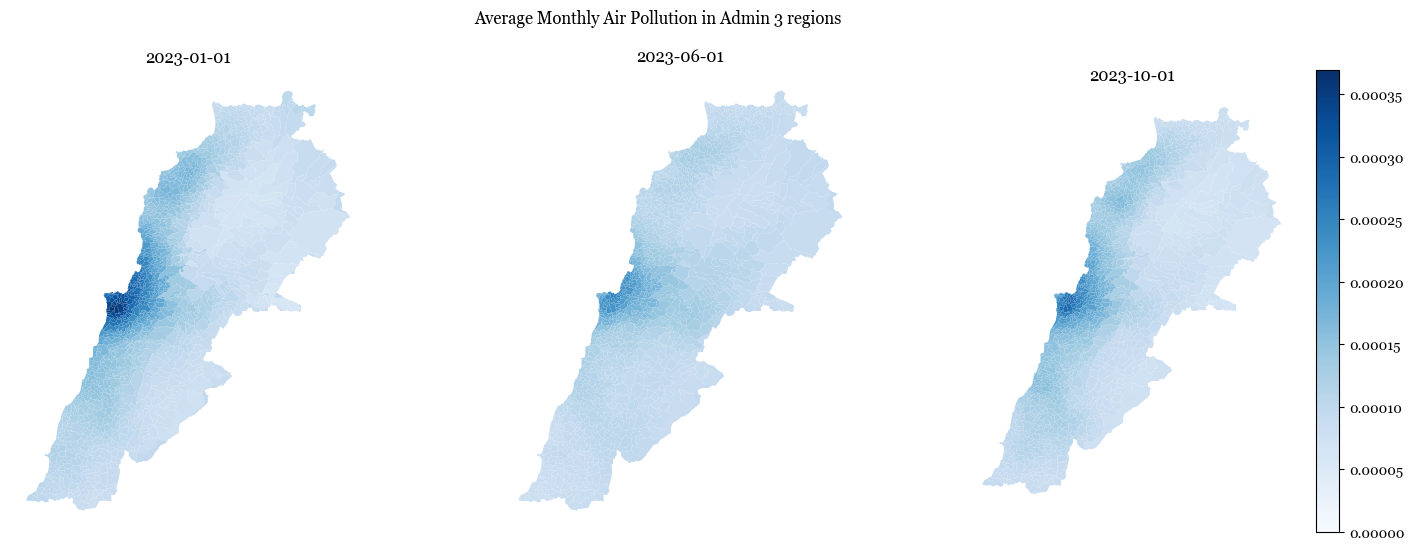

In [74]:
fig, ax = plt.subplots(1,3,figsize = (18,6))
plt.rcParams["font.family"] = "georgia"

for id, date in enumerate(['2023-01-01', '2023-06-01', '2023-10-01']):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_admin3_shp[monthly_no2_admin3_shp['date_y']==date].plot(column = 'NO2_column_number_density', legend = legend_bool, ax=ax[id], vmin=0, vmax = 0.00037, cmap='Blues')
    ax[id].axis('off')
    ax[id].set_title(date)

plt.suptitle('Average Monthly Air Pollution in Admin 3 regions')


In [75]:
monthly_no2_shp = lebanon_adm2.merge(monthly_no2, on = ['admin1Name', 'admin2Name'])

Text(0.5, 0.98, 'Average Monthly Air Pollution in Admin 2 regions')

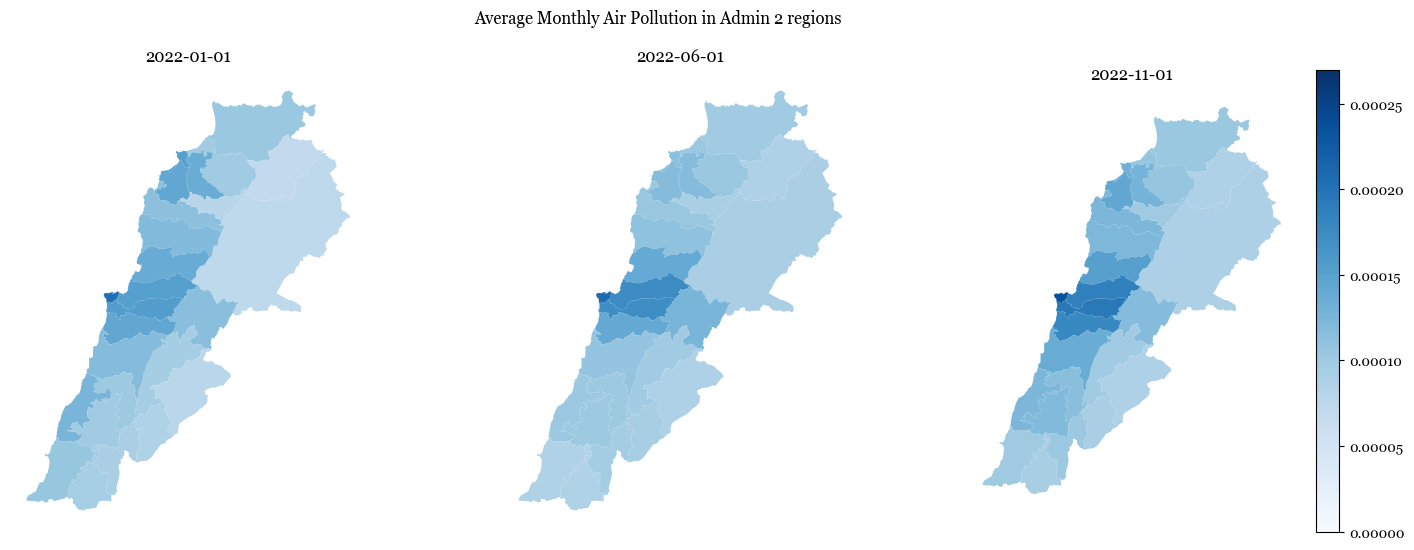

In [79]:
fig, ax = plt.subplots(1,3,figsize = (18,6))
plt.rcParams["font.family"] = "georgia"

for id, date in enumerate(['2022-01-01', '2022-06-01', '2022-11-01']):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_shp[monthly_no2_shp['date_y']==date].plot(column = 'NO2_column_number_density', legend = legend_bool,vmin=0, vmax = 0.00027, ax=ax[id],  cmap='Blues')
    ax[id].axis('off')
    ax[id].set_title(date)

plt.suptitle('Average Monthly Air Pollution in Admin 2 regions')
